# **Regressão com um conjunto de dados da idade do caranguejo**

**Objetivo**

Neste projeto, vamos ultilizar a base de dados com informações sobre carangueijos. A ideia é prever a idade do carangueijo (age) baseado em suas características físicas (variáveis preditivas).

**Atributos**

* **sex**: sexo do carangueijo
* **Length**: comprimento
* **Diameter**: diametro
* **Height**: altura
* **Weight**: peso
* **Shucked Weight**: peso sem a casca
* **Viscera Weight**: Peso que envolve os órgãos abdominais do caranguejo
* **Shell Weight**: peso da concha
* **age**: idade

In [1]:
#bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
!pip install kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"higormalz","key":"c38201ac118f4034abc8e430d6b88708"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle competitions download -c playground-series-s3e16

  0% 0.00/2.65M [00:00<?, ?B/s]
100% 2.65M/2.65M [00:00<00:00, 45.4MB/s]


In [8]:
!unzip /content/playground-series-s3e16.zip

Archive:  /content/playground-series-s3e16.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# **1. Exploração dos dados**

In [9]:
# carregando os dados em um DataFrame pandas
caranguejo_df = pd.read_csv('train.csv')

In [10]:
# visualizando as 5 primeiras linhas
caranguejo_df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [11]:
# visualizando o final do DataFrame
caranguejo_df.tail()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
74046,74046,F,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10
74047,74047,I,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6
74048,74048,F,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10
74049,74049,I,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774,8
74050,74050,I,0.9125,0.6750,0.2000,5.386405,2.055339,1.034757,1.700970,6


In [12]:
# Remoção da coluna (id)
carangueijo_df = caranguejo_df.drop(['id'],axis=1)

In [13]:
caranguejo_df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [14]:
# verificando a quantidade de valores nulos de cada coluna
caranguejo_df.isna().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [15]:
caranguejo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


# **2. Dados**

## **2.1 Variáveis númericas**

identificando as variáveis numéricas e criando uma nova coluna padronizando seus valores.

In [16]:
# selecionando somente as variáveis numéricas
caranguejo_df[["Length", "Diameter", "Height", "Weight", "Shucked Weight", "Viscera Weight", "Shell Weight"]].head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395


In [17]:
# padronizando a coluna (length)

media_length = caranguejo_df["Length"].mean() # media

# desvio padrao
desvio_padrao_length = caranguejo_df["Length"].std() # desvio padrao

caranguejo_df["Length_std"] = caranguejo_df["Length"].apply(lambda nota: (nota - media_length) / desvio_padrao_length)
caranguejo_df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Length_std
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,0.721233
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,-0.755707
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,0.243400
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11,1.329385
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,-0.234434


In [18]:
# padronizando a coluna (Diameter)

media_diameter = caranguejo_df["Diameter"].mean() # media

desvio_padrao_diameter = caranguejo_df['Diameter'].std() # desvio padrao

caranguejo_df["Diameter_std"] = caranguejo_df["Diameter"].apply(lambda nota: (nota - media_diameter) / desvio_padrao_diameter)
caranguejo_df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Length_std,Diameter_std
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,0.721233,0.633978
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,-0.755707,-0.840350
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,0.243400,0.370705
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11,1.329385,1.634415
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,-0.234434,-0.050532


In [19]:
# padronizando a coluna (Height)

media_height = caranguejo_df["Height"].mean() # media

desvio_padrao_height = caranguejo_df['Height'].std() # desvio padrao

caranguejo_df["Height_std"] = caranguejo_df["Height"].apply(lambda nota: (nota - media_height) / desvio_padrao_height)
caranguejo_df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Length_std,Diameter_std,Height_std
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,0.721233,0.633978,0.292398
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,-0.755707,-0.840350,-0.794158
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,0.243400,0.370705,0.292398
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11,1.329385,1.634415,1.650592
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,-0.234434,-0.050532,-0.115061


In [20]:
# padronizando a coluna (Weight)

media_weight = caranguejo_df["Weight"].mean() # media

desvio_padrao_weight = caranguejo_df['Weight'].std() # desvio padrao

caranguejo_df["Weight_std"] = caranguejo_df["Weight"].apply(lambda nota: (nota - media_weight) / desvio_padrao_weight)
caranguejo_df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Length_std,Diameter_std,Height_std,Weight_std
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,0.721233,0.633978,0.292398,0.441801
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,-0.755707,-0.840350,-0.794158,-1.025191
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,0.243400,0.370705,0.292398,0.110075
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11,1.329385,1.634415,1.650592,2.156468
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,-0.234434,-0.050532,-0.115061,-0.007598


In [21]:
# padronizando a coluna (Shucked Weight)

media_shucked_weight = caranguejo_df["Shucked Weight"].mean() # media

desvio_padrao_shucked_weight = caranguejo_df['Shucked Weight'].std() # desvio padrao

caranguejo_df["Shucked_Weight_std"] = caranguejo_df["Shucked Weight"].apply(lambda nota: (nota - media_shucked_weight) / desvio_padrao_shucked_weight)
caranguejo_df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Length_std,Diameter_std,Height_std,Weight_std,Shucked_Weight_std
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,0.721233,0.633978,0.292398,0.441801,0.467185
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,-0.755707,-0.840350,-0.794158,-1.025191,-0.993681
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,0.243400,0.370705,0.292398,0.110075,0.219923
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11,1.329385,1.634415,1.650592,2.156468,1.824604
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,-0.234434,-0.050532,-0.115061,-0.007598,0.333461


In [22]:
# padronizando a coluna (Viscera Weight)

media_viscera_weight = caranguejo_df["Viscera Weight"].mean() # media

desvio_padrao_viscera_weight = caranguejo_df['Viscera Weight'].std() # desvio padrao

caranguejo_df["viscera_weight_std"] = caranguejo_df["Viscera Weight"].apply(lambda nota: (nota - media_viscera_weight) / desvio_padrao_viscera_weight)
caranguejo_df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Length_std,Diameter_std,Height_std,Weight_std,Shucked_Weight_std,viscera_weight_std
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,0.721233,0.633978,0.292398,0.441801,0.467185,0.569182
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,-0.755707,-0.840350,-0.794158,-1.025191,-0.993681,-0.978873
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,0.243400,0.370705,0.292398,0.110075,0.219923,0.178362
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11,1.329385,1.634415,1.650592,2.156468,1.824604,2.124608
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,-0.234434,-0.050532,-0.115061,-0.007598,0.333461,-0.197232


In [23]:
# padronizando a coluna (Shell Weight)

media_shell_weight = caranguejo_df["Shell Weight"].mean() # media

desvio_padrao_shell_weight = caranguejo_df['Shell Weight'].std() # desvio padrao

caranguejo_df["shell_weight_std"] = caranguejo_df["Shell Weight"].apply(lambda nota: (nota - media_shell_weight) / desvio_padrao_shell_weight)
caranguejo_df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Length_std,Diameter_std,Height_std,Weight_std,Shucked_Weight_std,viscera_weight_std,shell_weight_std
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,0.721233,0.633978,0.292398,0.441801,0.467185,0.569182,0.453373
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,-0.755707,-0.840350,-0.794158,-1.025191,-0.993681,-0.978873,-0.926782
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,0.243400,0.370705,0.292398,0.110075,0.219923,0.178362,-0.017224
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11,1.329385,1.634415,1.650592,2.156468,1.824604,2.124608,2.308079
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,-0.234434,-0.050532,-0.115061,-0.007598,0.333461,-0.197232,-0.214954


### **Explorando relações das variáveis númericas com a idade.**

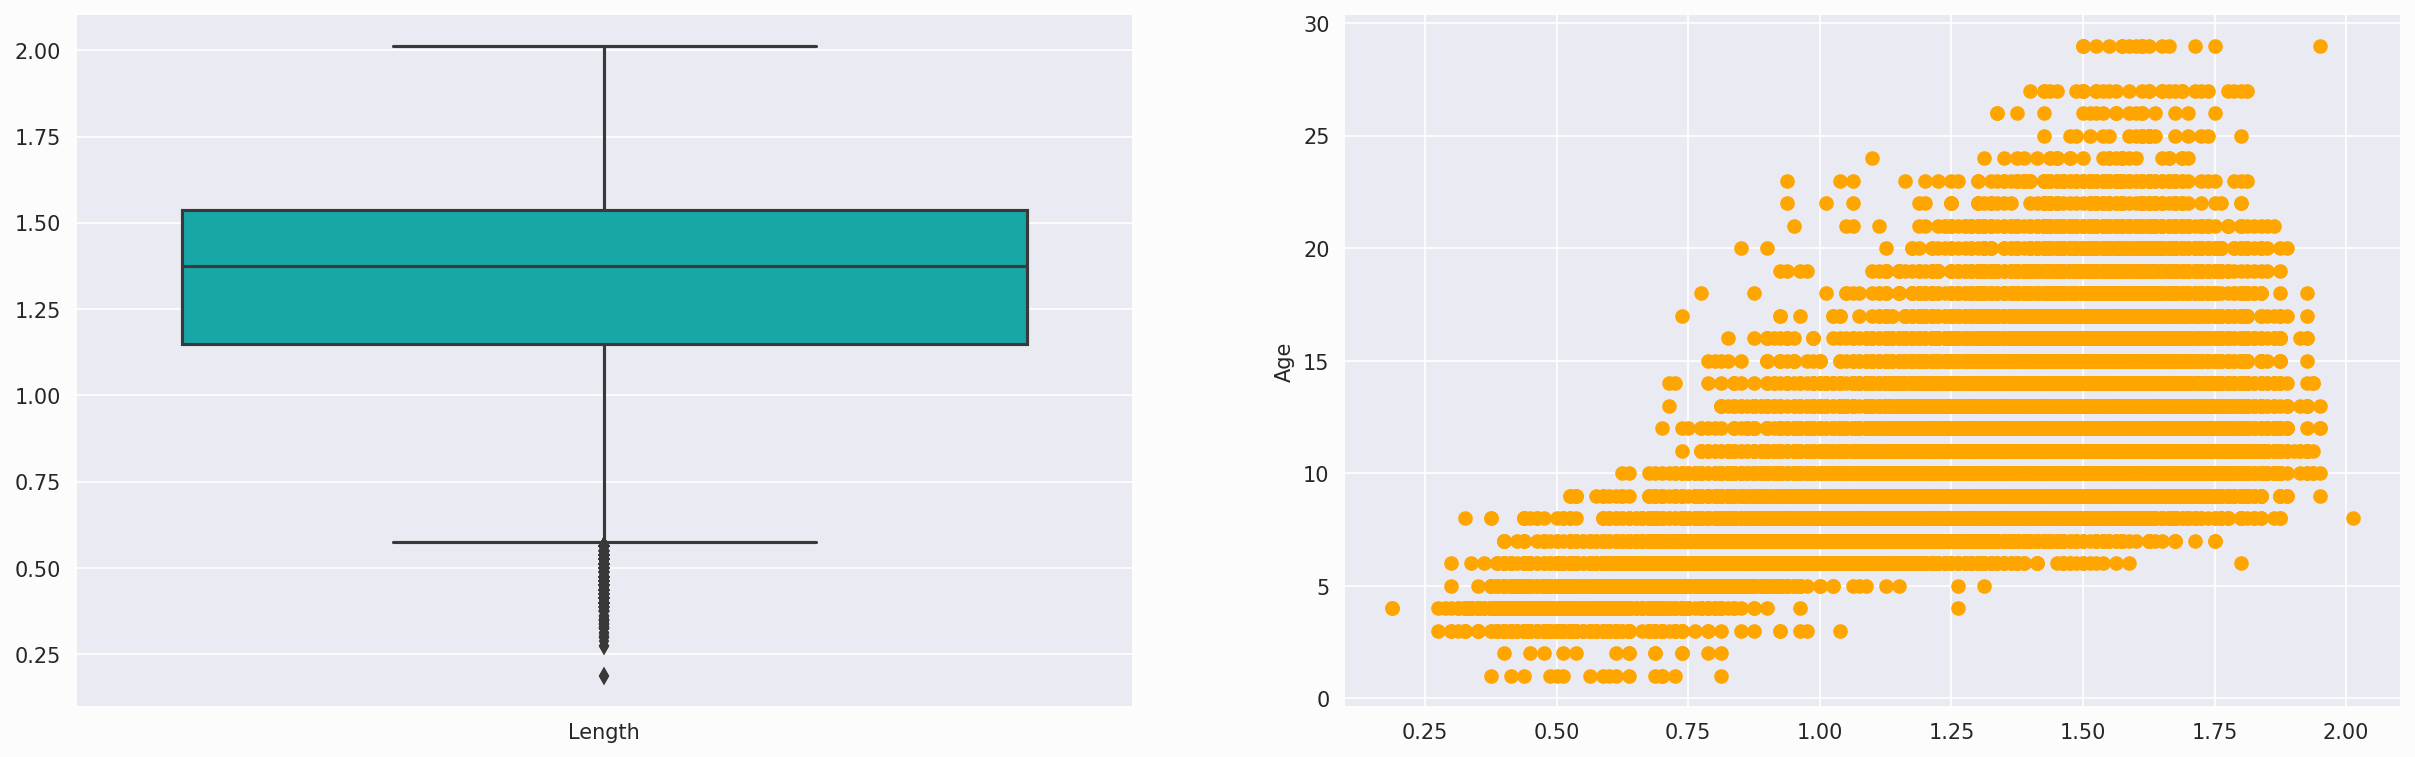

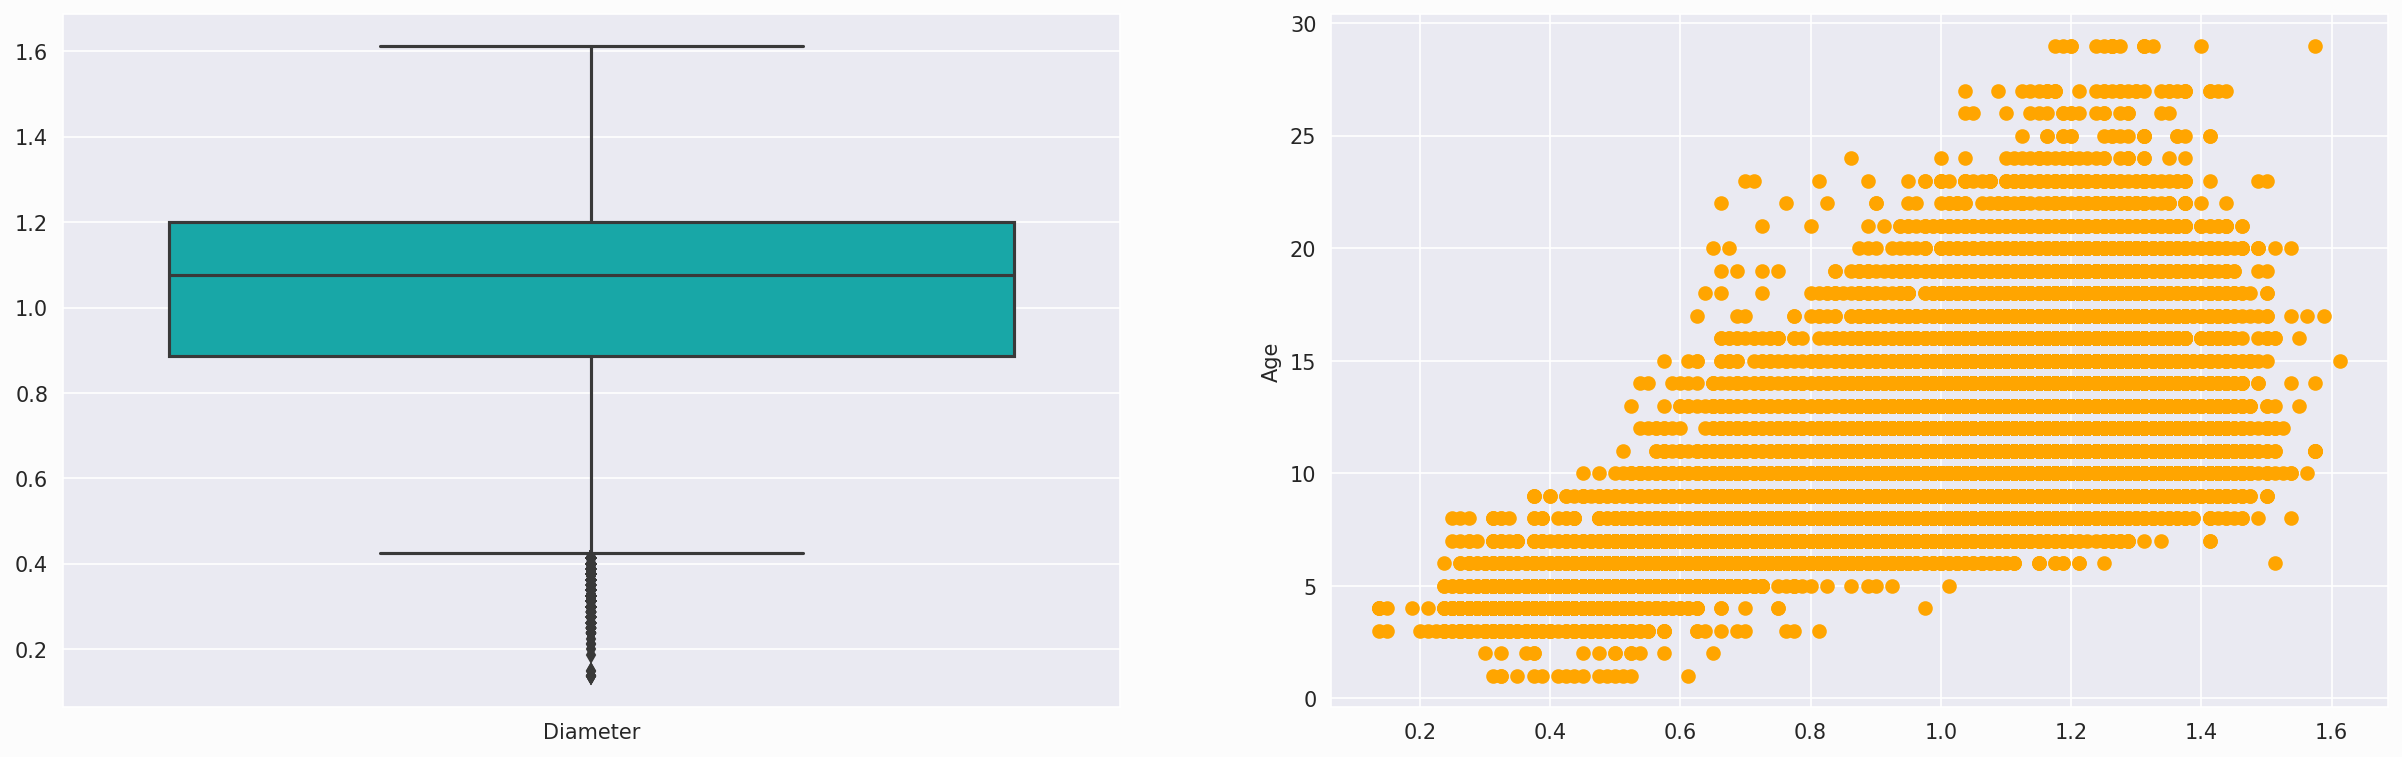

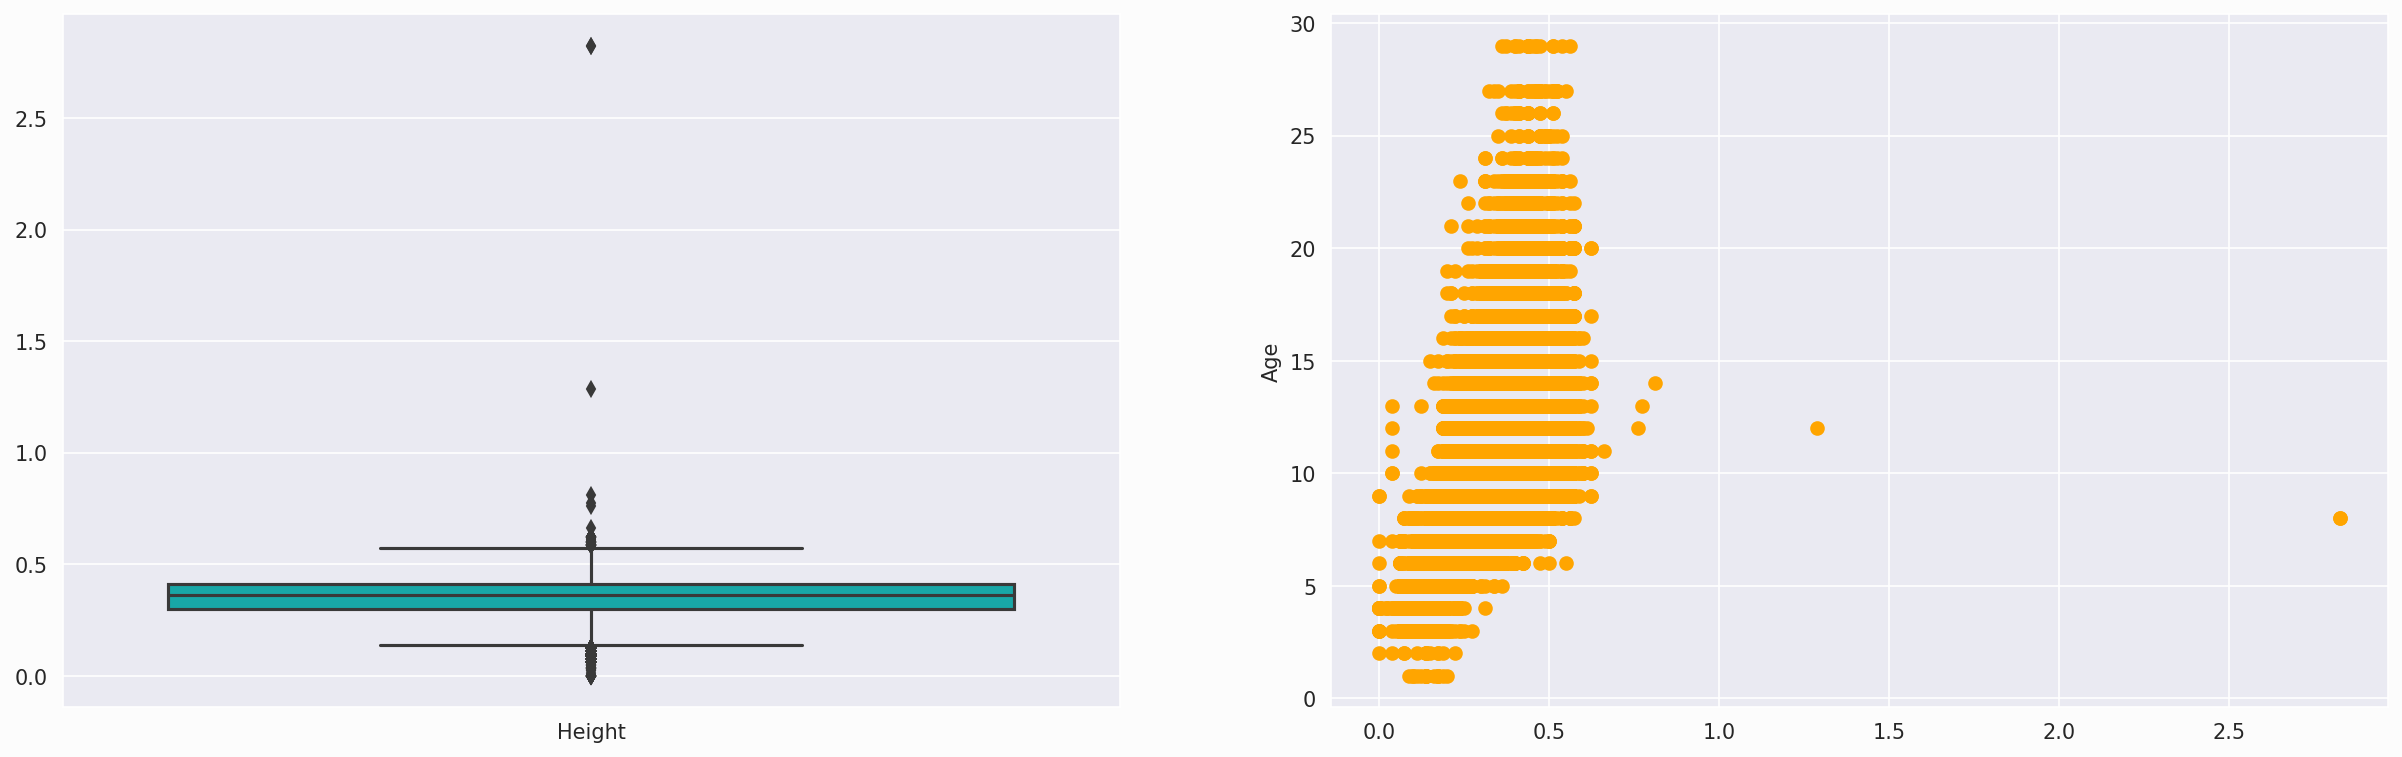

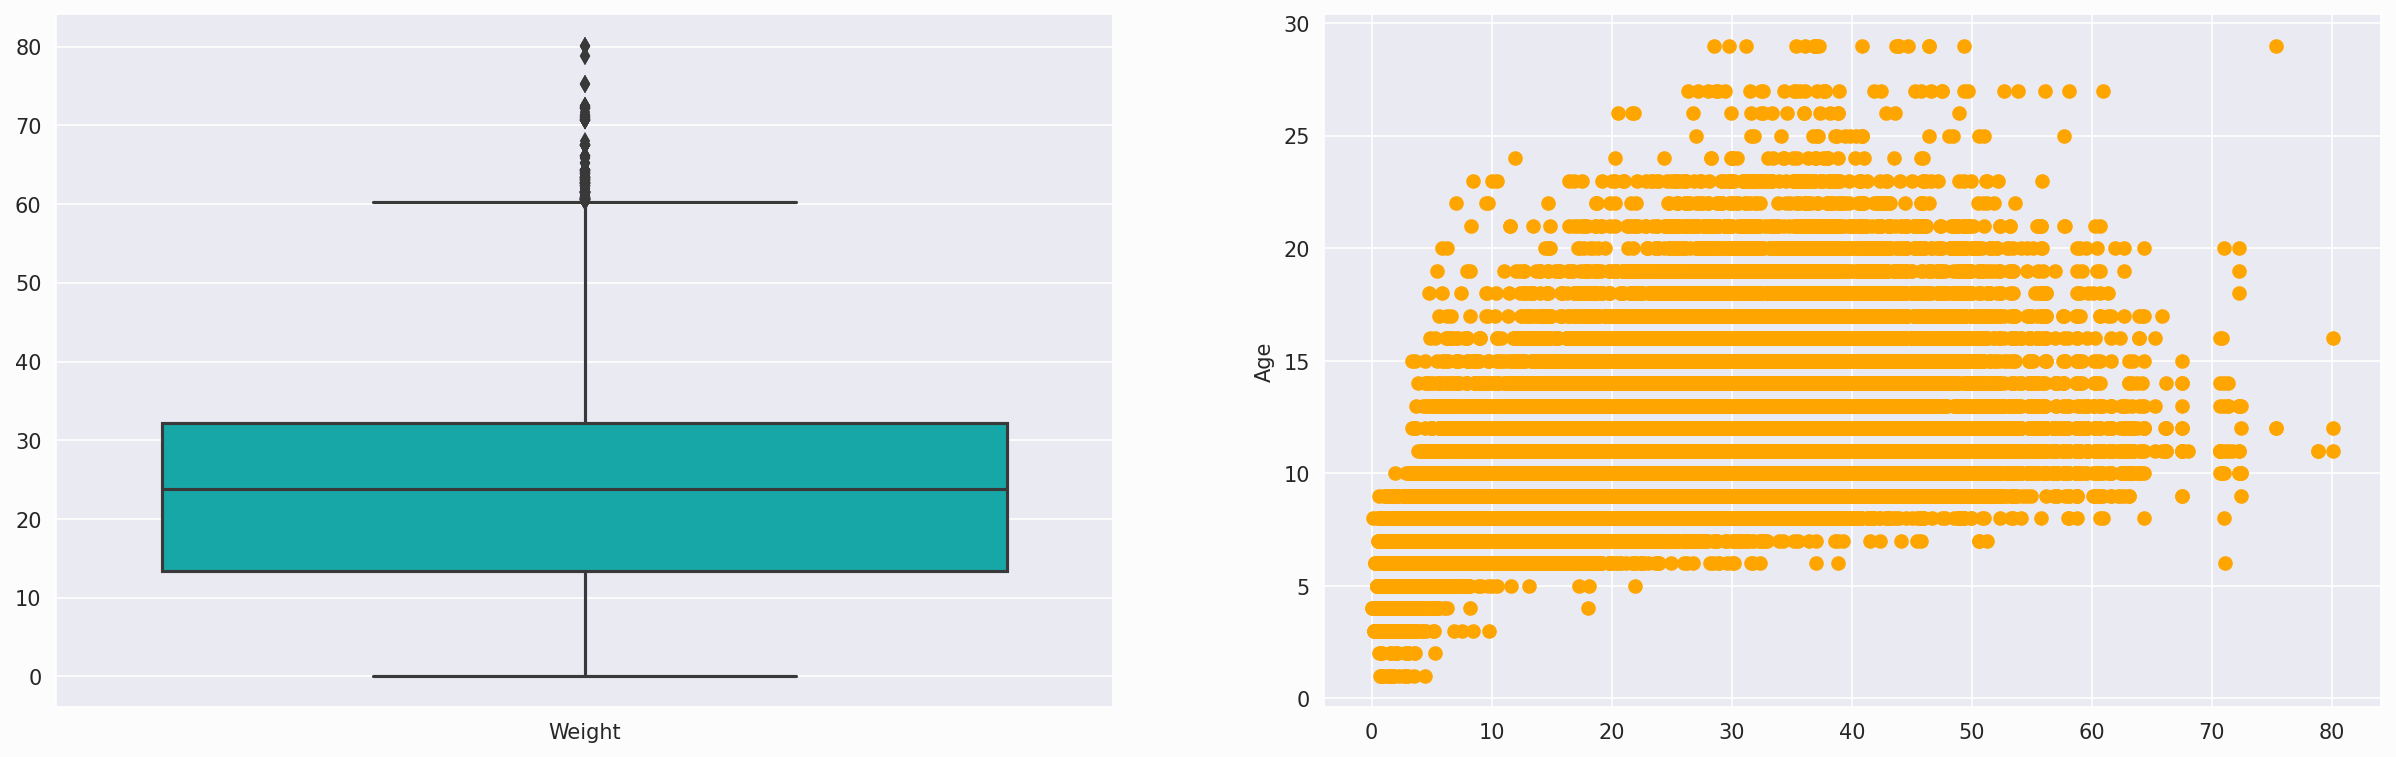

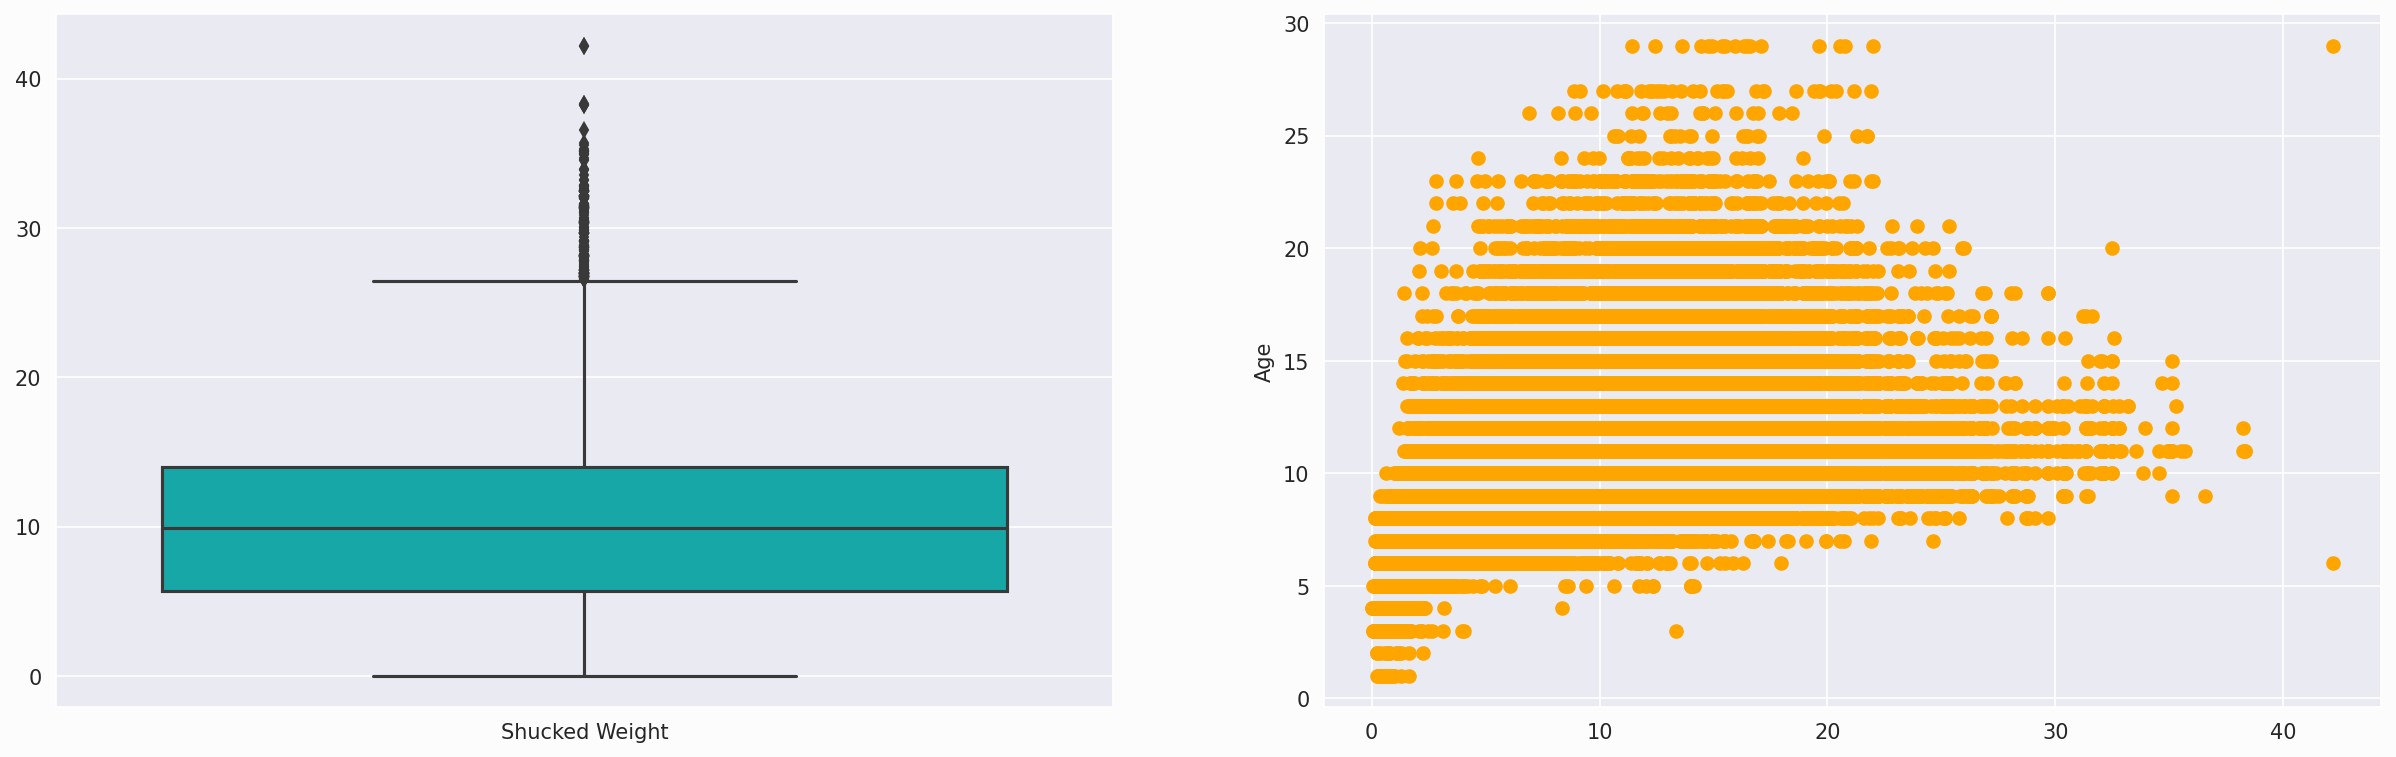

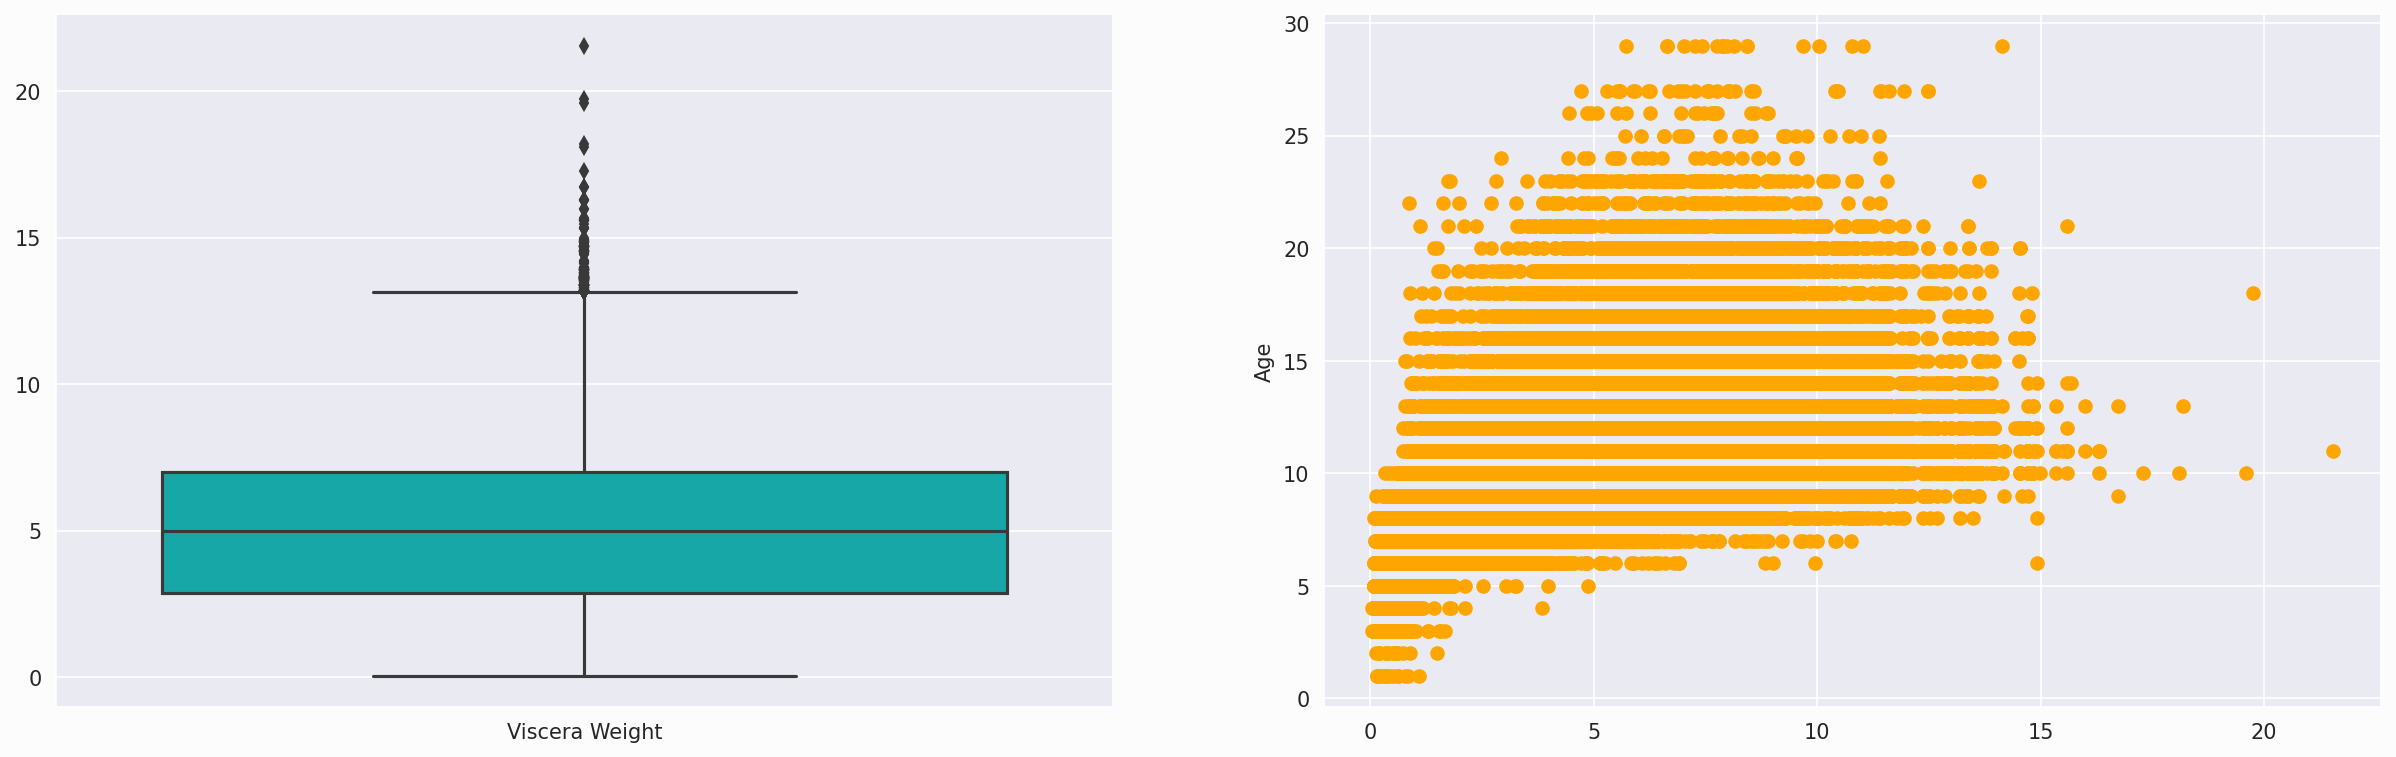

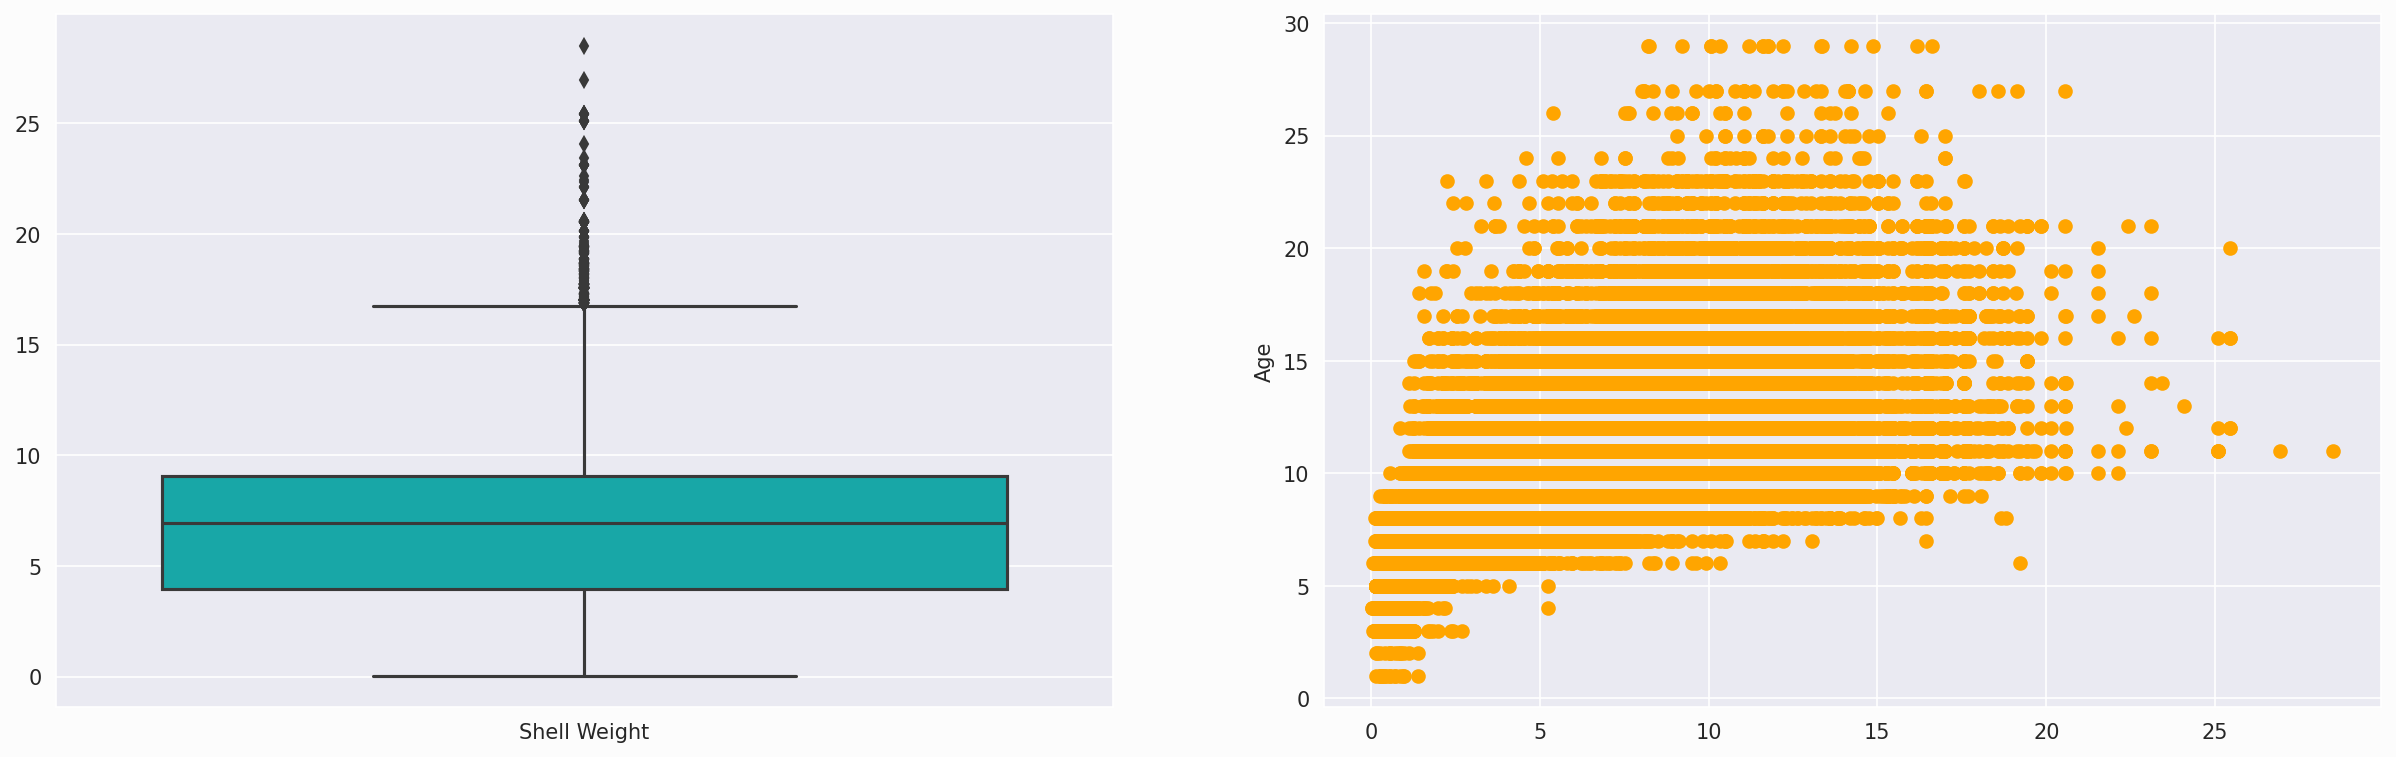

In [24]:
sns.set_style('darkgrid')
num_col = [['Length'], ['Diameter'], ['Height'], ['Weight'], ['Shucked Weight'],['Viscera Weight'], ['Shell Weight']]

for feat in num_col:
    plt.figure(figsize=(20,6),edgecolor= 'blue',facecolor= '#FCFCFC',dpi=150)
    ax1 = plt.subplot(1,2,1)
    sns.boxplot(caranguejo_df[feat],color='c')  #Boxplot

    ax2 = plt.subplot(1,2,2)
    plt.scatter(x=caranguejo_df[feat],y = caranguejo_df['Age'],color='orange') #Scatterplot with Age
    plt.ylabel('Age')
    plt.show()

## **2.2 Variáveis categóricas**

In [25]:
# Atributo categorico nominal
caranguejo_df[["Sex"]].head()

# ultilizando o one hot encoding
caranguejo_df["Sex_i_nom"] = caranguejo_df["Sex"].apply(lambda sex: 1 if sex == "I" else 0)
caranguejo_df["Sex_m_nom"] = caranguejo_df["Sex"].apply(lambda sex: 1 if sex == "M" else 0)
caranguejo_df["Sex_f_nom"] = caranguejo_df["Sex"].apply(lambda sex: 1 if sex == "F" else 0)

caranguejo_df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Length_std,Diameter_std,Height_std,Weight_std,Shucked_Weight_std,viscera_weight_std,shell_weight_std,Sex_i_nom,Sex_m_nom,Sex_f_nom
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,0.721233,0.633978,0.292398,0.441801,0.467185,0.569182,0.453373,1,0,0
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,-0.755707,-0.840350,-0.794158,-1.025191,-0.993681,-0.978873,-0.926782,1,0,0
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,0.243400,0.370705,0.292398,0.110075,0.219923,0.178362,-0.017224,0,1,0
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11,1.329385,1.634415,1.650592,2.156468,1.824604,2.124608,2.308079,0,0,1
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,-0.234434,-0.050532,-0.115061,-0.007598,0.333461,-0.197232,-0.214954,1,0,0


### **Visualizando a relação entre sexo e idade através de gráfico**

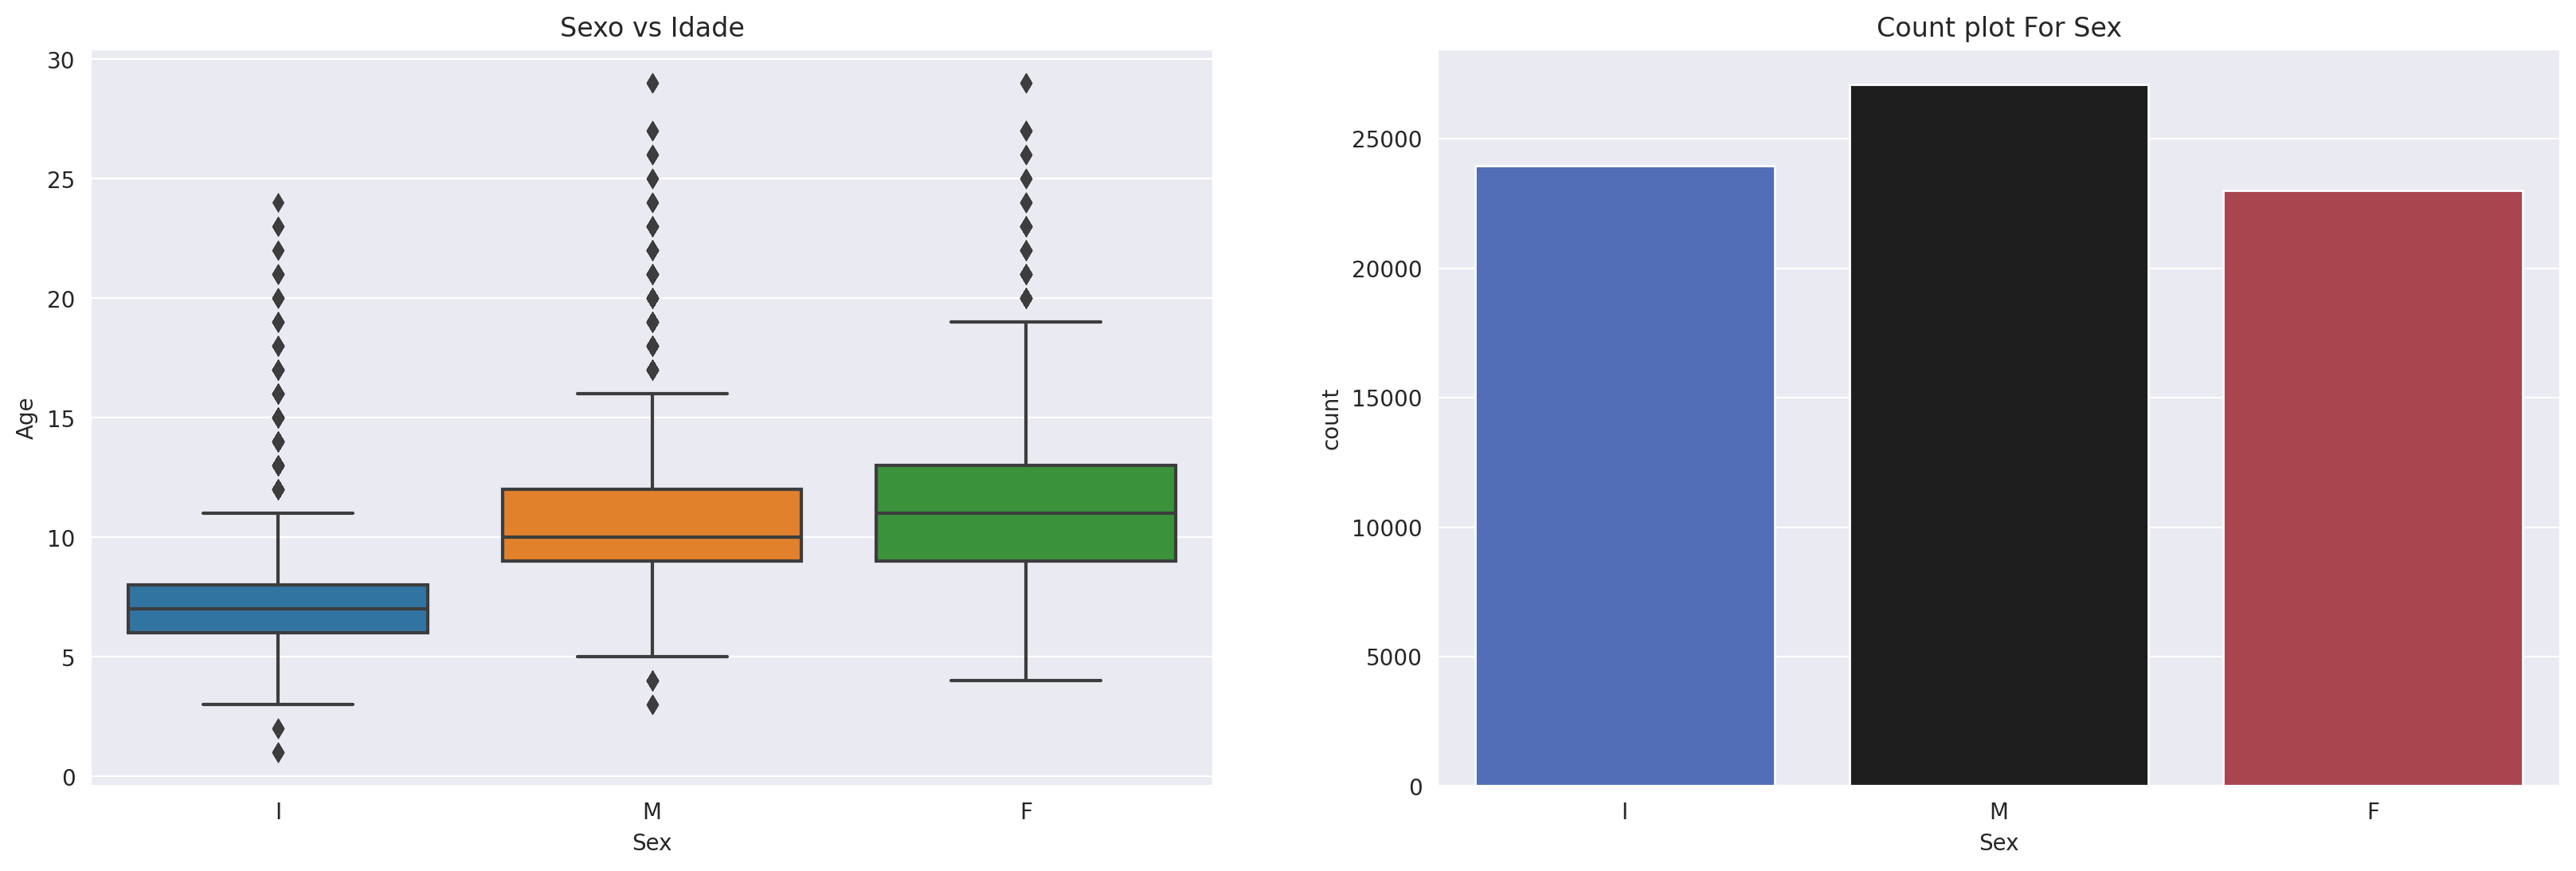

In [26]:
fig, axes = plt.subplots(1, 2, figsize = (20, 6),dpi=200)
sns.boxplot(data=caranguejo_df,x='Sex',y='Age',ax=axes[0]).set_title('Sexo vs Idade')
sns.countplot(data=caranguejo_df,x='Sex',ax=axes[1],palette='icefire').set_title('Count plot For Sex')
plt.show()

## **2.3 Limpeza**

In [27]:
data = caranguejo_df.drop(["id","Sex", "Length", "Diameter", "Height", "Weight", "Shucked Weight", "Viscera Weight", "Shell Weight"], axis=1)

In [28]:
data.head()

,Age,Length_std,Diameter_std,Height_std,Weight_std,Shucked_Weight_std,viscera_weight_std,shell_weight_std,Sex_i_nom,Sex_m_nom,Sex_f_nom
0,9,0.721233,0.633978,0.292398,0.441801,0.467185,0.569182,0.453373,1,0,0
1,8,-0.755707,-0.840350,-0.794158,-1.025191,-0.993681,-0.978873,-0.926782,1,0,0
2,9,0.243400,0.370705,0.292398,0.110075,0.219923,0.178362,-0.017224,0,1,0
3,11,1.329385,1.634415,1.650592,2.156468,1.824604,2.124608,2.308079,0,0,1
4,8,-0.234434,-0.050532,-0.115061,-0.007598,0.333461,-0.197232,-0.214954,1,0,0


## **2.4 Treino/Teste**

In [65]:
# criando um modelo vazio

model = LinearRegression()

In [66]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    data.drop(['Age'], axis=1),
    data['Age'],
    test_size=0.33,
    random_state=123
)

* Variáveis preditoras

In [67]:
predictors_train.head()

,Length_std,Diameter_std,Height_std,Weight_std,Shucked_Weight_std,viscera_weight_std,shell_weight_std,Sex_i_nom,Sex_m_nom,Sex_f_nom
69619,1.068749,0.897251,0.835675,0.898432,0.961709,1.386353,0.615512,1,0,0
4540,0.417157,0.423359,0.156578,0.410422,0.424292,0.457519,0.220052,0,1,0
27464,-0.234434,-0.419114,-0.794158,-0.669930,-0.544572,-0.907815,-0.582732,1,0,0
62135,-0.929464,-1.050969,-1.201616,-1.149589,-1.220758,-1.166670,-1.084966,1,0,0
73295,1.025309,0.791941,1.650592,1.445946,1.557157,2.096935,1.129609,0,0,1


In [68]:
predictors_train.shape

(49614, 10)

In [69]:
predictors_test.head()

,Length_std,Diameter_std,Height_std,Weight_std,Shucked_Weight_std,viscera_weight_std,shell_weight_std,Sex_i_nom,Sex_m_nom,Sex_f_nom
45359,-0.147555,-0.208495,-0.386699,-0.558981,-0.537003,-0.699716,-0.562959,0,1,0
41258,1.242506,1.423796,1.107314,2.067933,1.052540,1.203631,2.236897,0,0,1
41230,-0.495070,-0.366459,0.428217,-0.537688,-0.554664,-0.425634,-0.412684,0,1,0
62393,0.199960,0.160087,0.292398,0.115679,-0.221617,0.147908,0.299144,0,1,0
1568,-0.408191,-0.261150,-0.794158,-0.632947,-0.799403,-0.522070,-0.491776,1,0,0


In [70]:
predictors_test.shape

(24437, 10)

* Variável resposta

In [71]:
target_train.head()

69619    12
4540     10
27464     8
62135     7
73295    12
Name: Age, dtype: int64

In [72]:
target_train.shape

(49614,)

In [73]:
target_test.head()

45359     9
41258    18
41230     8
62393    10
1568      7
Name: Age, dtype: int64

In [74]:
target_test.shape

(24437,)

# **3.1 Treino**

In [75]:
model = model.fit(predictors_train, target_train)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Length_std', 'Diameter_std', 'Height_std', 'Weight_std',
        'Shucked_Weight_std', 'viscera_weight_std', 'shell_weight_std',
        'Sex_i_nom', 'Sex_m_nom', 'Sex_f_nom'], dtype=object),
 'n_features_in_': 10,
 'coef_': array([ 0.19672938,  0.5385946 ,  0.70674568,  2.56879632, -3.51110834,
        -0.60365386,  1.77381299, -0.65764312,  0.2658883 ,  0.39175483]),
 'rank_': 9,
 'singular_': array([5.76710479e+02, 1.29866402e+02, 9.87470403e+01, 8.96315207e+01,
        7.36229410e+01, 6.01121460e+01, 5.05093260e+01, 2.26136237e+01,
        2.18436379e+01, 3.58808039e-14]),
 'intercept_': 9.961264360020166}

* Avaliação

In [76]:
target_predicted = model.predict(predictors_test)

In [77]:
rmse = np.sqrt(mean_squared_error(target_test, target_predicted))
print(rmse)

2.124091498456156


# **4. Predição**

* Selecionando uma linha do DataFrame para fazer a predição

In [78]:
data.head(n=5)

,Age,Length_std,Diameter_std,Height_std,Weight_std,Shucked_Weight_std,viscera_weight_std,shell_weight_std,Sex_i_nom,Sex_m_nom,Sex_f_nom
0,9,0.721233,0.633978,0.292398,0.441801,0.467185,0.569182,0.453373,1,0,0
1,8,-0.755707,-0.840350,-0.794158,-1.025191,-0.993681,-0.978873,-0.926782,1,0,0
2,9,0.243400,0.370705,0.292398,0.110075,0.219923,0.178362,-0.017224,0,1,0
3,11,1.329385,1.634415,1.650592,2.156468,1.824604,2.124608,2.308079,0,0,1
4,8,-0.234434,-0.050532,-0.115061,-0.007598,0.333461,-0.197232,-0.214954,1,0,0


In [86]:
data.head(1)

,Age,Length_std,Diameter_std,Height_std,Weight_std,Shucked_Weight_std,viscera_weight_std,shell_weight_std,Sex_i_nom,Sex_m_nom,Sex_f_nom
0,9,0.721233,0.633978,0.292398,0.441801,0.467185,0.569182,0.453373,1,0,0


In [87]:
caranguejo = np.array([0.721233,	0.633978,	0.292398,	0.441801,	0.467185,	0.569182,	0.453373,	1,	0,	0])

In [88]:
print(caranguejo)

[0.721233 0.633978 0.292398 0.441801 0.467185 0.569182 0.453373 1.
 0.       0.      ]


In [89]:
idade = model.predict(caranguejo.reshape(1, -1))
print(idade)

[9.94878675]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# **5. Conclusão**

Neste projeto ultilizamos a base de dados sobre caranguejos. A ideia é prever a idade do caranguejo através de suas características físicas. Utilizando as técnicas de **Machine learning** treinamos o nosso modelo de **regressão linear** com os dados de treino (2/3) e logo após calculamos o **RMSE** treinado com os dados de teste. O **rmse** nada mais é do quanto o valor predito varia do valor real, e no nosso caso o valor foi de aproximadamente 2 anos.
Com o modelo treinado utilizamos ele para realizar predições.